<a href="https://colab.research.google.com/github/ajaythakur3369/PRODIGY_ML_02/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Task-02**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - Prodigy InfoTech**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/PRODIGY_ML_02/blob/main/Task_02.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1wh5g-cSOZbQQeH90jY2Suatb1Kahxx3s)**

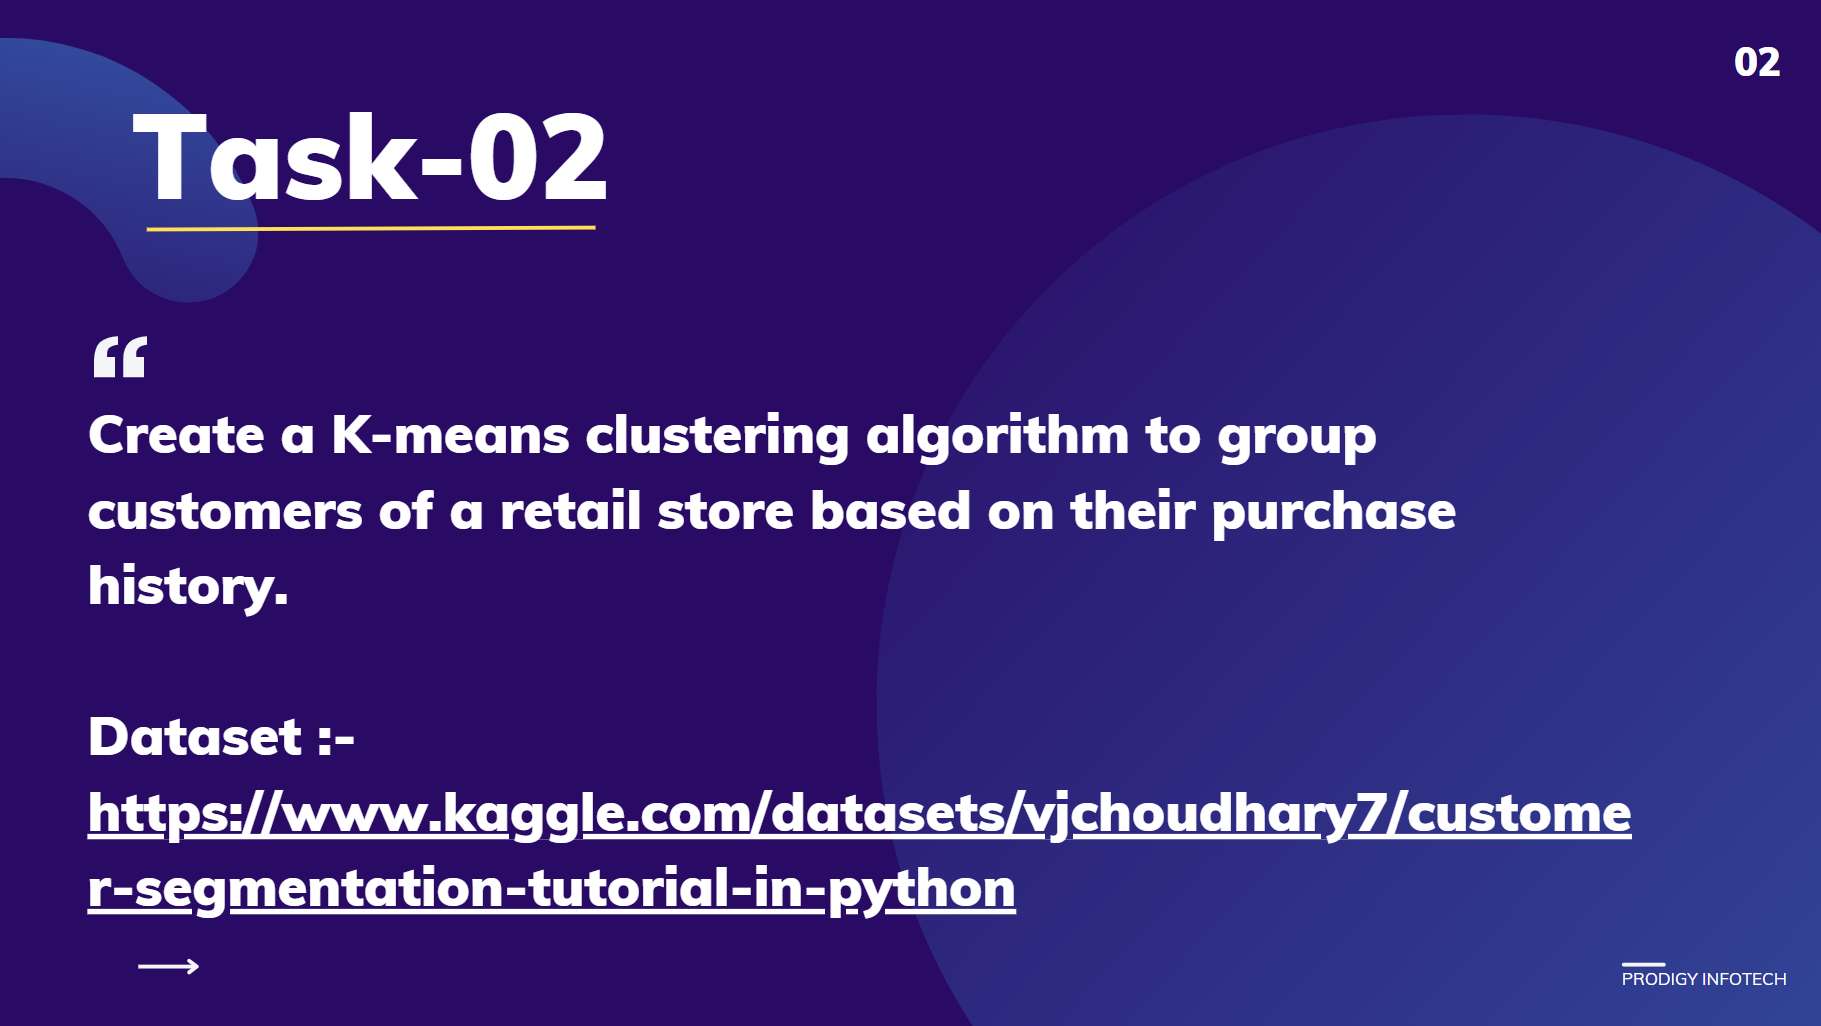

# **Problem Statement -**

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

**Dataset -** https://www.kaggle.com/datasets/vjchoudhoudhary7/customer-segmentation-tutorial-in-python

# **Let's Begin !**

In [ ]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Access the Drive from Colab, for accessing required file
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/folders/Task_2_Prodigy_File.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# First 5 rows of our data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(["CustomerID"], axis = 1, inplace = True)

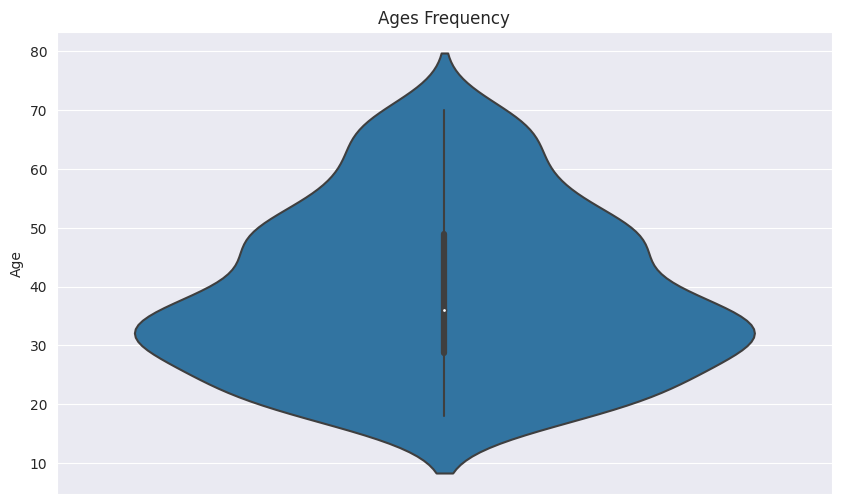

In [ ]:
# I made a box plot of spending score and annual income to better visualize the distribution range.
# The range of spending score is clearly more than the annual income range.

plt.figure(figsize = (10, 6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y = df["Age"])
plt.show()

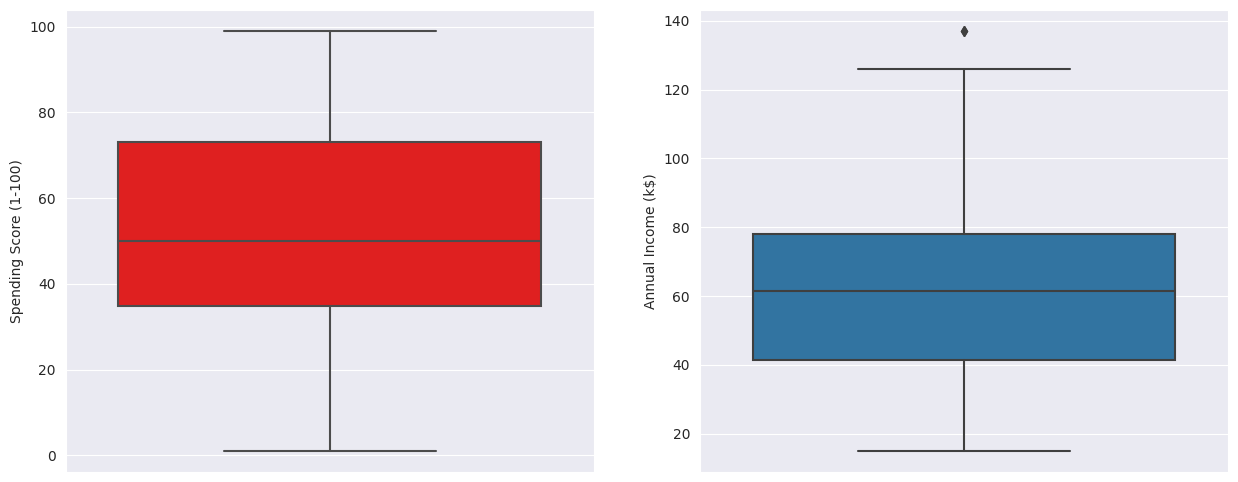

In [ ]:
# I made a bar plot to check the distribution of male and female population in the dataset
# The female population clearly outweighs the male counterpart
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y = df["Spending Score (1-100)"], color = "red")
plt.subplot(1, 2, 2)
sns.boxplot(y = df["Annual Income (k$)"])
plt.show()

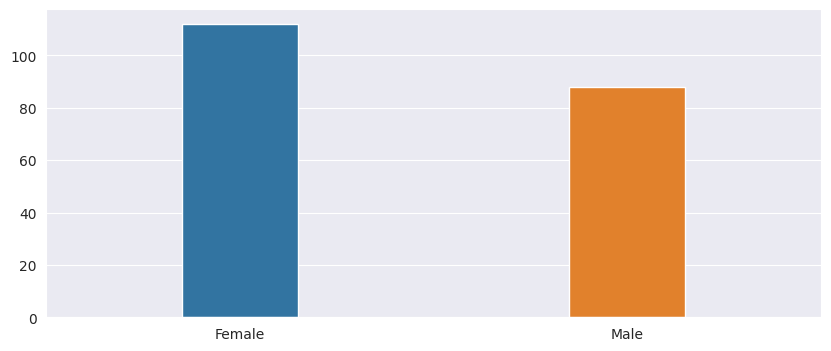

In [ ]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10, 4))
sns.barplot(x = genders.index, y = genders.values, width = 0.3)
plt.show()

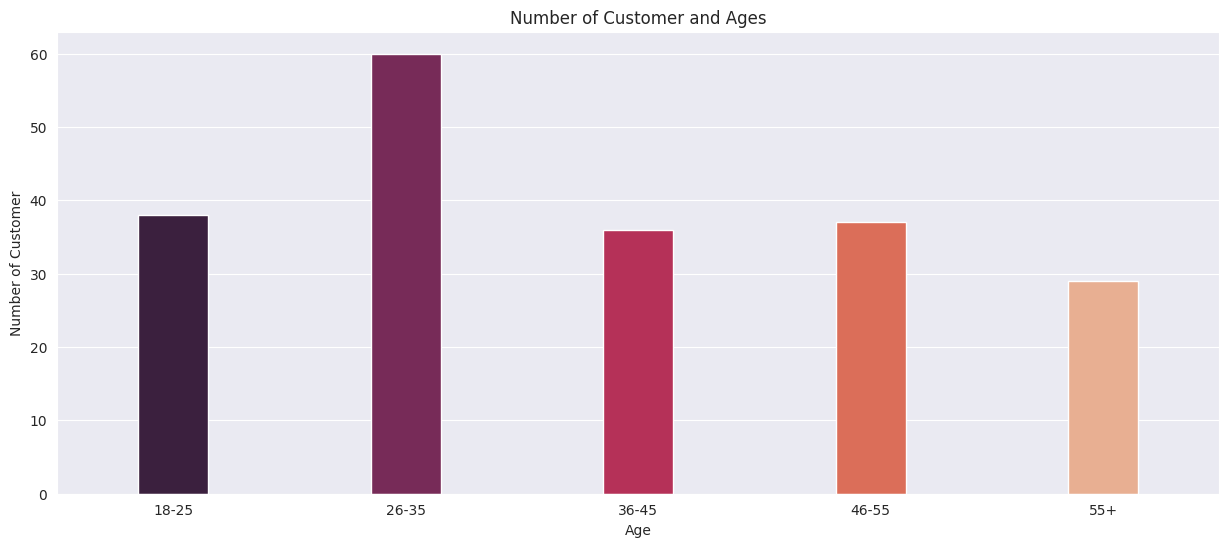

In [ ]:
# I continued with making a bar plot to visualize the number of customers according to their spending scores.
# The majority of the customers have spending score in the range 41–60.
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize = (15, 6))
sns.barplot(x = x, y = y, palette = "rocket", width = 0.3)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

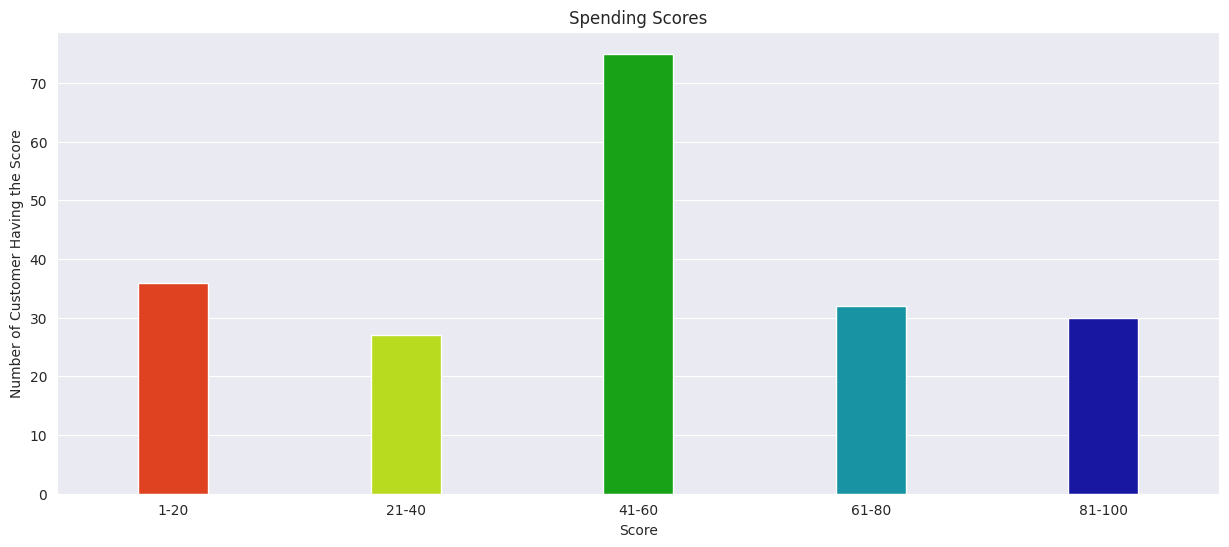

In [ ]:
# I made a bar plot to visualize the number of customers according to their annual income
# The majority of the customers have annual income in the range 60000 and 90000
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize = (15, 6))
sns.barplot(x = ssx, y = ssy, palette = "nipy_spectral_r", width = 0.3)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

In [ ]:
data = df.iloc[:, [1, 3]].values
from sklearn.cluster import KMeans
# Within cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data)
    # inertia_ = to find the wcss value
    wcss.append(kmeans.inertia_)

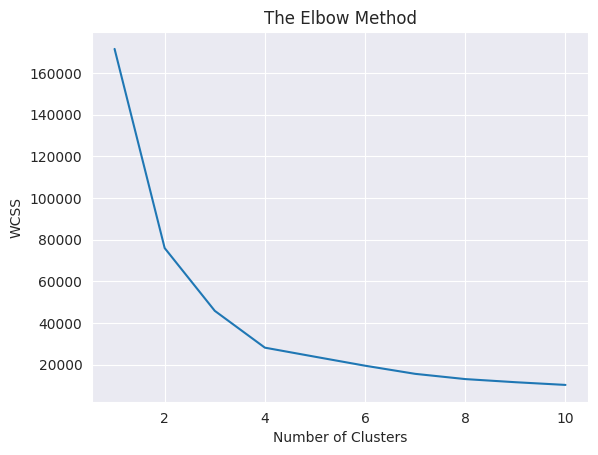

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data)

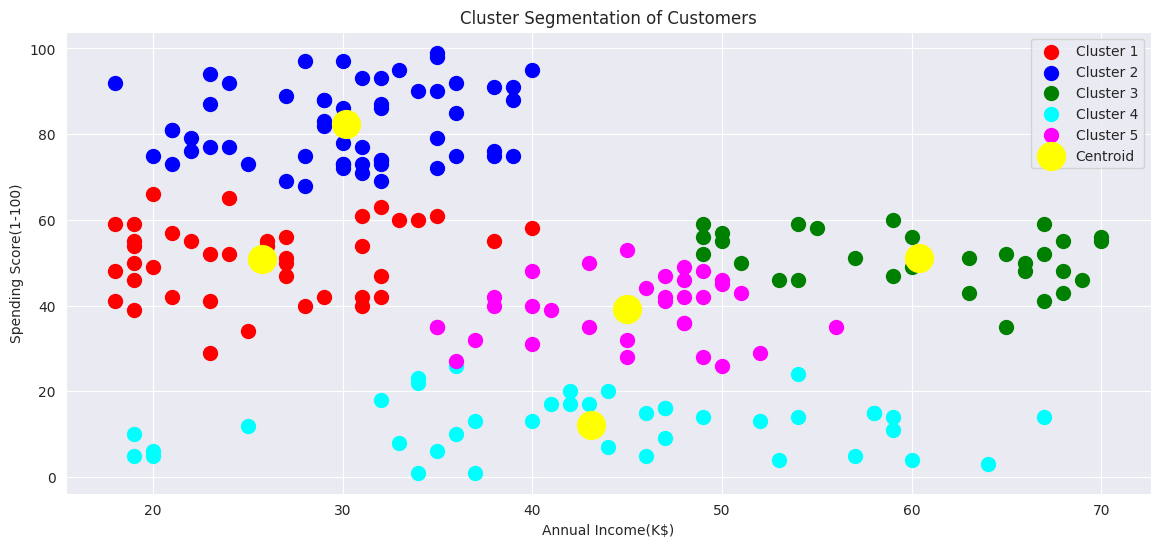

In [ ]:
# Plotting the the clusters
fig,ax = plt.subplots(figsize = (14, 6))
ax.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'yellow', label = 'Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

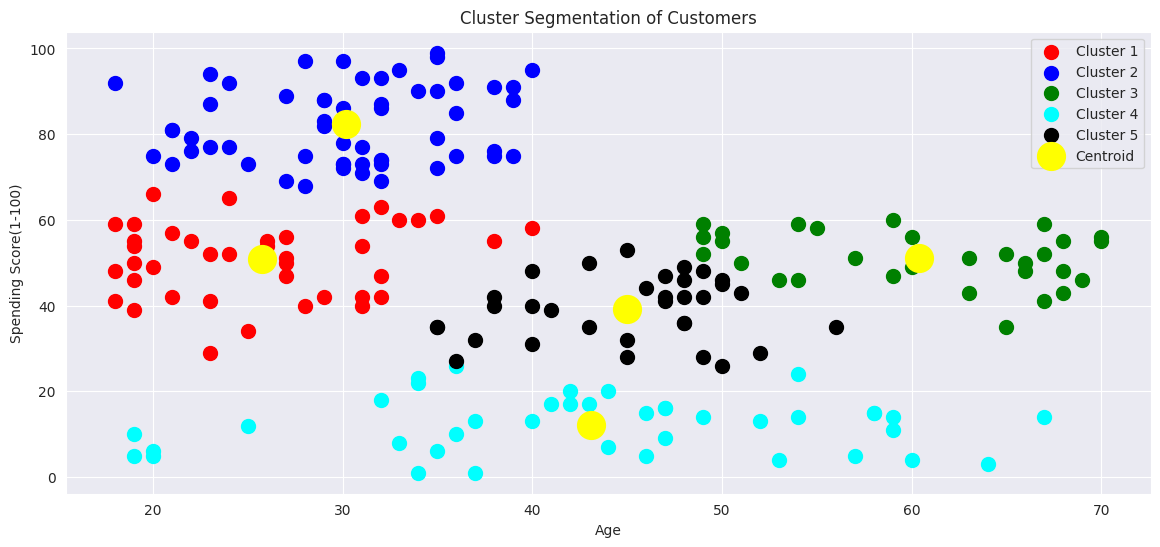

In [ ]:
# Plotting the clusters
fig,ax = plt.subplots(figsize = (14, 6))
ax.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 400, c = 'yellow', label = 'Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [ ]:
# I made a 3D plot to visualize the spending score of the customers with their annual income
# The data points are separated into 5 classes which are represented in different colours as shown in the 3D plot
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df.iloc[:, 1:])
df["label"] = clusters

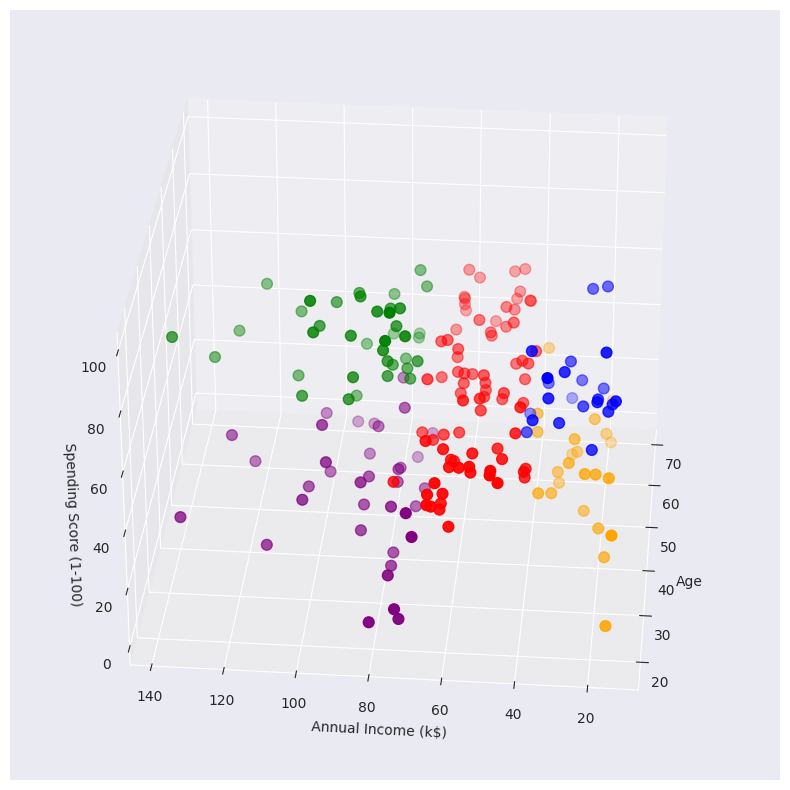

In [ ]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c = 'purple', s = 60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()